smart_hans_08022022_194751_7_250-281_08_gny_.csv
smart_hans_08022022_192131_8_280-310_08_wny_.csv
smart_hans_08022022_190823_13_429-460_08_mny_person_hat_nicht_auf_huf_geschaut.csv
smart_hans_07312022_170216_4_149-178_08_mgy_furz_lachen_am_ende.csv
smart_hans_08022022_182746_7_242-273_08_wny_.csv
smart_hans_08022022_184110_5_176-207_08_mgy_.csv
smart_hans_07312022_185231_4_153-182_08_mny_.csv
smart_hans_07312022_174011_10_330-358_08_mny_.csv
smart_hans_08022022_192219_4_154-184_08_wny_person_hat_nach_12_gewackelt.csv
smart_hans_08022022_191248_9_307-336_08_mny_.csv
smart_hans_08022022_205208_8_276-308_08_wnn_.csv
smart_hans_08022022_191134_12_403-433_08_mny_.csv
smart_hans_08022022_185137_12_400-430_08_mny_.csv
smart_hans_08022022_172713_13_435-465_08_mgn_.csv
smart_hans_08022022_211022_9_314-345_08_mgy_.csv
smart_hans_07312022_164838_8_276-305_08_mgy_klatschen_8_ende.csv
smart_hans_08022022_184808_8_276-305_08_mny_.csv
smart_hans_08022022_195222_3_123-154_08_gny_.csv
smart_hans_080220

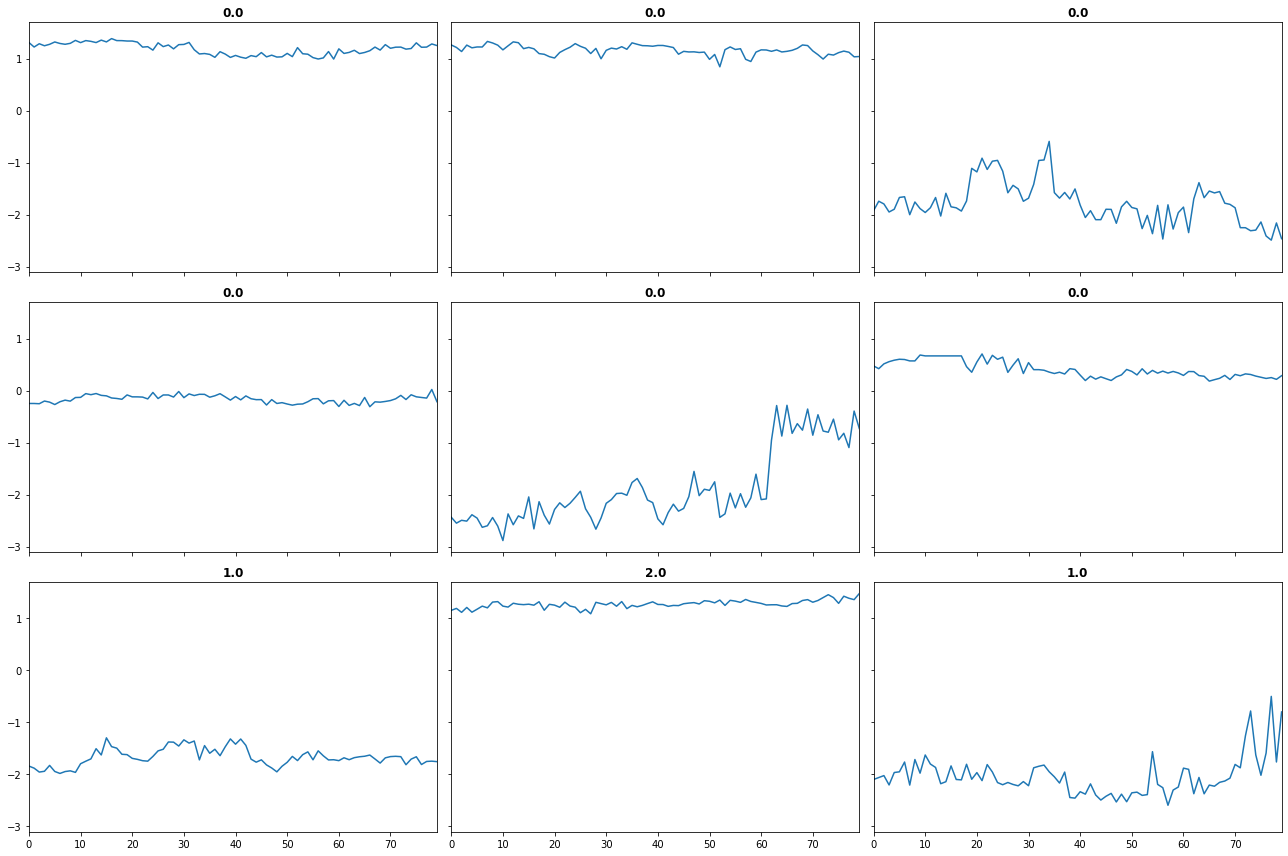

In [96]:
from tsai.all import *
import pandas as pd
from datenverarbeitung.dataloader import dataloader
import datetime
CUDA_LAUNCH_BLOCKING=1

num_scenario = 1
nr_taps = 2
model_to_use = "InceptionTimePlus"
learning_cycles = 100
features_to_learn_with = ["pitch"]
feature_list_string = '_'.join(features_to_learn_with)

models_folder = "models"
plots_folder = "vis/plots"
save_name = "scenario_{}_{}".format(num_scenario, model_to_use)

dl = dataloader(scenario= num_scenario, path="/Users/adi/Nextcloud/smart_hans/AP2/Daten/headpose_opencv_pitch_roll_yaw_20220904", nr_taps=nr_taps, move_window_by=-10, feature_list=features_to_learn_with)
train, test= dl.get_train_test(frac = 0.8, seed = 0)

X_test, y_test = df2xy(test, target_col='target')
X_train, y_train = df2xy(train, target_col='target')

X, y, splits = combine_split_data([X_train, X_test], [y_train, y_test])

tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
dsets

dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=[TSStandardize()], num_workers=0)

dls.show_batch(sharey=True)

In [97]:

scenario_name_stage0 = save_name+"_nr_taps_{}_features_{}".format(str(nr_taps), feature_list_string)+"_stage0"
model = InceptionTime(dls.vars, dls.c)
learn = ts_learner(dls, model, metrics=accuracy, train_metrics=True)
learn.save(scenario_name_stage0)

Path('models/scenario_1_InceptionTimePlus_nr_taps_2_features_pitch_stage0.pth')

SuggestedLRs(valley=0.002511886414140463)

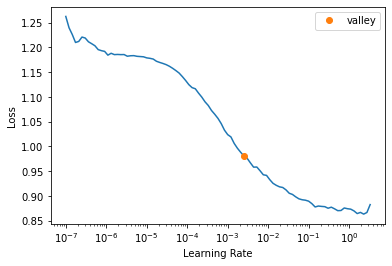

In [98]:
learn.load(scenario_name_stage0)
learn.lr_find()

In [99]:
scenario_name_stage1 = scenario_name_stage0.replace("0","1")
learn.fit_one_cycle(learning_cycles, lr_max=1e-3)
learn.save(scenario_name_stage1)

epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,1.046057,0.466518,1.033470,0.615721,00:06
1,0.956867,0.669643,0.932797,0.698690,00:05
2,0.883764,0.746652,0.836022,0.685589,00:05
3,0.827649,0.756696,0.805217,0.685589,00:05
4,0.786385,0.750000,0.800636,0.689956,00:05
5,0.758774,0.752232,0.766638,0.689956,00:05
6,0.737238,0.747768,0.811303,0.689956,00:05
7,0.722198,0.751116,0.777460,0.698690,00:05
8,0.709535,0.765625,0.829910,0.694323,00:05
9,0.701502,0.760045,0.866011,0.663755,00:05


Path('models/scenario_1_InceptionTimePlus_nr_taps_2_features_pitch_stage1.pth')

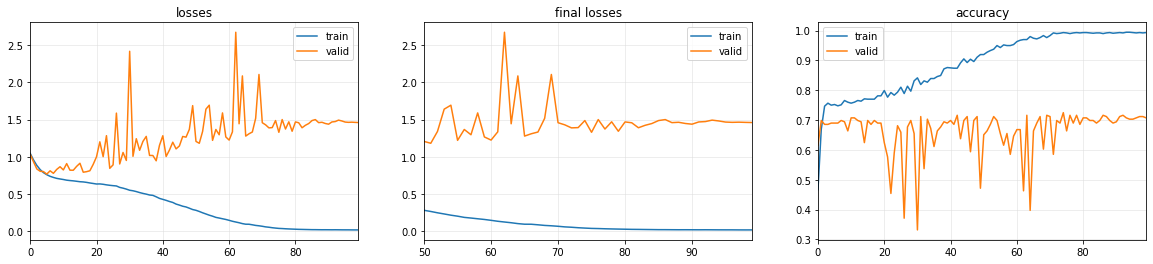

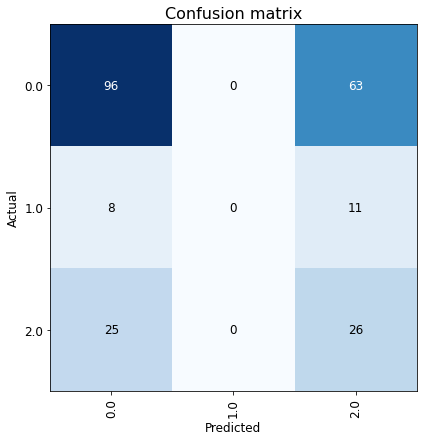

In [100]:
learn.recorder.plot_metrics()
learn.plot_confusion_matrix()
feature_list_string = '_'.join(features_to_learn_with)
current_time= datetime.datetime.now().strftime('%d%m%Y_%H%M%S')
plot_name = plots_folder+"/confusion_matrix_"+save_name+"_nrtaps_{}_features_{}_learning_cycles_{}_{}.png".format(str(nr_taps),feature_list_string,learning_cycles, current_time)
plt.savefig(plot_name, ext='png', bbox_inches="tight")

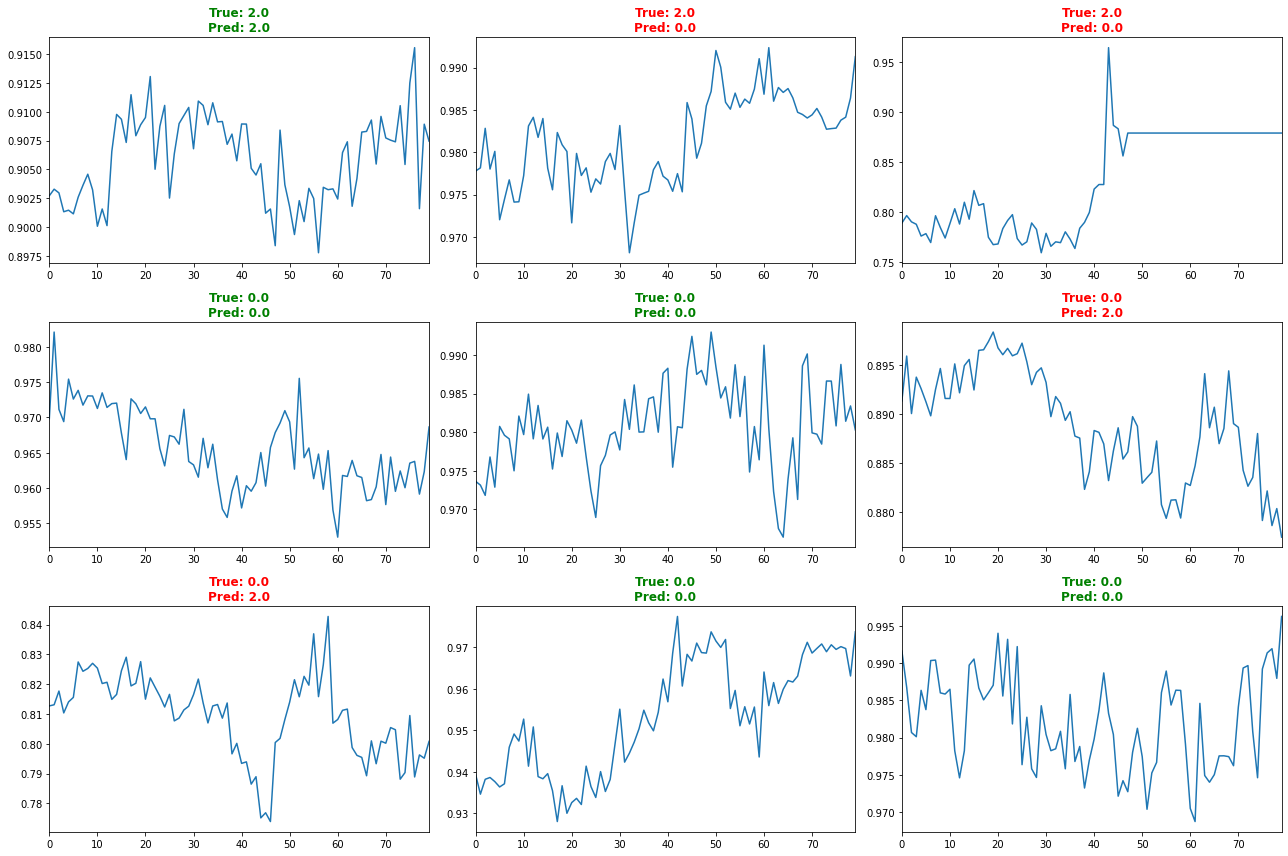

In [101]:
learn.show_results()

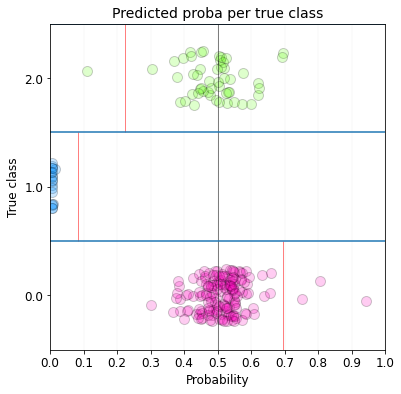

In [102]:
learn.show_probas()
#was sagt probability aus? accuracy vs probability?